<a href="https://colab.research.google.com/github/rishabhr136/Resume/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/Customer-Churn-Dataset.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.drop(["customerID"],axis=1,inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
pd.to_numeric(df.TotalCharges,errors="coerce").isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [9]:
df[pd.to_numeric(df.TotalCharges,errors="coerce").isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df.iloc[488,-2]

' '

In [11]:
df_1 = df[df.TotalCharges !=" "]
df_1.shape

(7032, 20)

In [12]:
df_1.TotalCharges= pd.to_numeric(df_1.TotalCharges)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [13]:
df_1.TotalCharges.dtype

dtype('float64')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


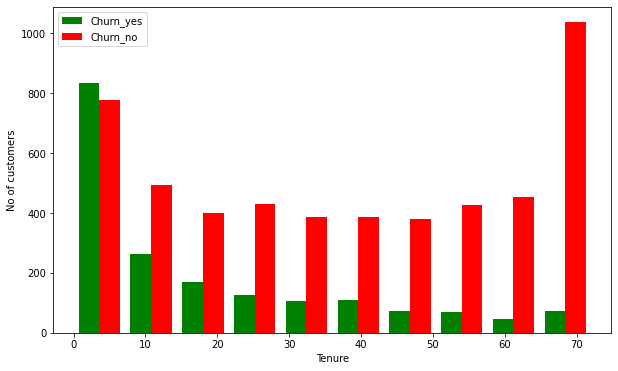

In [14]:
import matplotlib.pyplot as plt
tenure_no = df[df.Churn=="No"].tenure
tenure_yes = df[df.Churn=="Yes"].tenure
plt.figure(figsize=(10,6))
plt.xlabel("Tenure")
plt.ylabel("No of customers")
plt.hist([tenure_yes,tenure_no],label=["Churn_yes","Churn_no"],color=["green","red"])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


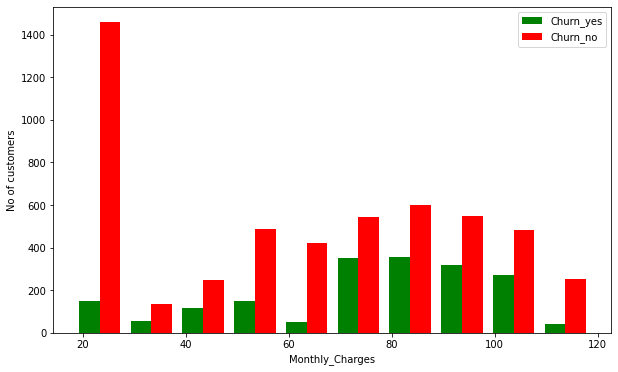

In [15]:
Mc_no = df[df.Churn=="No"].MonthlyCharges
Mc_yes = df[df.Churn=="Yes"].MonthlyCharges
plt.figure(figsize=(10,6))
plt.xlabel("Monthly_Charges")
plt.ylabel("No of customers")
plt.hist([Mc_yes,Mc_no],label=["Churn_yes","Churn_no"],color=["green","red"])
plt.legend()

In [16]:
def unique_col_val(df):
    for col in df:
        if df[col].dtype =="object":
            print(f"{col} : {df[col].unique()}")

In [17]:
unique_col_val(df_1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [18]:
df_1.replace("No internet service","No",inplace=True)
df_1.replace("No phone service","No",inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [19]:
unique_col_val(df_1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [20]:
df_1.shape

(7032, 20)

In [21]:
yes_or_no = ['PhoneService', 'Partner','Dependents','MultipleLines', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies', 'PaperlessBilling', 'Churn']
for col in yes_or_no:
    df_1[col].replace({"Yes":1,"No":0},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [22]:
df_1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [23]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

df_1['tenure_group'] = pd.cut(df_1.tenure, range(1, 80, 12), right=False, labels=labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [24]:
df_1['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
49 - 60     832
25 - 36     832
37 - 48     762
Name: tenure_group, dtype: int64

In [25]:
#drop column tenure
df_1.drop(columns= ['tenure'], axis=1, inplace=True)
df_1.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,1,0,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,0,0,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,0,0,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,0,0,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,0,0,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1 - 12


In [26]:
df_2= pd.get_dummies(df_1)
df_2.head()

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,1,0,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
1,0,0,0,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,0,0,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
3,0,0,0,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,0,1,70.70,151.65,1,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0


In [28]:
df_2.shape

(7032, 33)

In [29]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [30]:
x=df_2.drop('Churn',axis=1)
x

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,1,0,0,0,0,1,0,0,0,0,1,29.85,29.85,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
1,0,0,0,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
2,0,0,0,1,0,1,1,0,0,0,0,1,53.85,108.15,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
3,0,0,0,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,1,1,0,1,1,1,1,1,84.80,1990.50,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
7039,0,1,1,1,1,0,1,1,0,1,1,1,103.20,7362.90,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
7040,0,1,1,0,0,1,0,0,0,0,0,1,29.60,346.45,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
7041,1,1,0,1,1,0,0,0,0,0,0,1,74.40,306.60,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0


In [31]:
y = df_2["Churn"]
y[:5]

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [33]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [34]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [35]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [36]:
model_dt.score(x_test,y_test)

0.7953091684434968

In [37]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1032
           1       0.62      0.59      0.60       375

    accuracy                           0.80      1407
   macro avg       0.74      0.73      0.73      1407
weighted avg       0.79      0.80      0.79      1407



In [38]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [41]:
y_pred=model_rf.predict(x_test)

In [42]:
model_rf.score(x_test,y_test)

0.8031272210376688

In [43]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1032
           1       0.70      0.45      0.55       375

    accuracy                           0.80      1407
   macro avg       0.76      0.69      0.71      1407
weighted avg       0.79      0.80      0.79      1407



In [44]:
from imblearn.combine import SMOTEENN

In [45]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_sample(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [46]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [47]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [48]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9234737747205503
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       504
           1       0.93      0.93      0.93       659

    accuracy                           0.92      1163
   macro avg       0.92      0.92      0.92      1163
weighted avg       0.92      0.92      0.92      1163



In [49]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[460  44]
 [ 45 614]]


In [50]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [51]:
model_rf_smote.fit(xr_train,yr_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [52]:
yr_predict = model_rf_smote.predict(xr_test)

In [53]:
model_score_r = model_rf_smote.score(xr_test, yr_test)

In [54]:
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.938950988822012
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       504
           1       0.94      0.95      0.95       659

    accuracy                           0.94      1163
   macro avg       0.94      0.94      0.94      1163
weighted avg       0.94      0.94      0.94      1163



In [55]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[463  41]
 [ 30 629]]


In [56]:
import keras 
import tensorflow as tf

In [60]:
model = keras.models.Sequential([
    keras.layers.Dense(20,input_shape = (x.shape[1],),activation = "relu"),
    keras.layers.Dense(1,activation="sigmoid"),
])
model.compile(optimizer="adam",
              loss  = "binary_crossentropy",
              metrics = ["accuracy"]
)

In [61]:
model.fit(x_train,y_train,epochs=32)

Epoch 1/32
176/176 [==============================] - 13s 3ms/step - loss: 52.5762 - accuracy: 0.5152
Epoch 2/32
176/176 [==============================] - 1s 3ms/step - loss: 0.6125 - accuracy: 0.7398
Epoch 3/32
176/176 [==============================] - 0s 3ms/step - loss: 0.5773 - accuracy: 0.7532
Epoch 4/32
176/176 [==============================] - 1s 3ms/step - loss: 0.5138 - accuracy: 0.7807
Epoch 5/32
176/176 [==============================] - 0s 3ms/step - loss: 0.6193 - accuracy: 0.7659
Epoch 6/32
176/176 [==============================] - 1s 3ms/step - loss: 0.5943 - accuracy: 0.7559
Epoch 7/32
176/176 [==============================] - 1s 3ms/step - loss: 0.9375 - accuracy: 0.7531
Epoch 8/32
176/176 [==============================] - 1s 3ms/step - loss: 0.6505 - accuracy: 0.7693
Epoch 9/32
176/176 [==============================] - 1s 3ms/step - loss: 0.6502 - accuracy: 0.7709
Epoch 10/32
176/176 [==============================] - 1s 3ms/step - loss: 0.5573 - accuracy: 0.77

In [62]:
model.fit(xr_train,yr_train,epochs=32)

Epoch 1/32
146/146 [==============================] - 1s 3ms/step - loss: 0.2984 - accuracy: 0.8892
Epoch 2/32
146/146 [==============================] - 0s 3ms/step - loss: 0.3158 - accuracy: 0.8907
Epoch 3/32
146/146 [==============================] - 0s 3ms/step - loss: 0.2796 - accuracy: 0.9017
Epoch 4/32
146/146 [==============================] - 0s 3ms/step - loss: 0.4638 - accuracy: 0.8813
Epoch 5/32
146/146 [==============================] - 1s 3ms/step - loss: 0.3346 - accuracy: 0.8942
Epoch 6/32
146/146 [==============================] - 0s 3ms/step - loss: 0.5345 - accuracy: 0.8787
Epoch 7/32
146/146 [==============================] - 1s 4ms/step - loss: 0.5199 - accuracy: 0.8793
Epoch 8/32
146/146 [==============================] - 0s 3ms/step - loss: 0.3208 - accuracy: 0.8985
Epoch 9/32
146/146 [==============================] - 0s 3ms/step - loss: 0.2965 - accuracy: 0.9026
Epoch 10/32
146/146 [==============================] - 0s 3ms/step - loss: 0.3486 - accuracy: 0.8907

In [63]:
model.evaluate(xr_test,yr_test)

37/37 [==============================] - 1s 2ms/step - loss: 0.3347 - accuracy: 0.9089


[0.3347259759902954, 0.9088563919067383]

In [64]:
y_pred = model.predict(xr_test)
y_pred[0:5]

array([[1.7585226e-05],
       [9.9970168e-01],
       [9.9988019e-01],
       [3.0125151e-03],
       [6.0844200e-04]], dtype=float32)

In [65]:
y_pred_sigmoid = []
for i in y_pred:
    if i > 0.5:
        y_pred_sigmoid.append(1)
    else:
        y_pred_sigmoid.append(0)

In [66]:
y_pred_sigmoid[:10]

[0, 1, 1, 0, 0, 0, 1, 1, 0, 0]

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(yr_test,y_pred_sigmoid))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       504
           1       0.96      0.88      0.92       659

    accuracy                           0.91      1163
   macro avg       0.91      0.91      0.91      1163
weighted avg       0.91      0.91      0.91      1163



Text(0.5, 51.0, 'Predicted_Values')

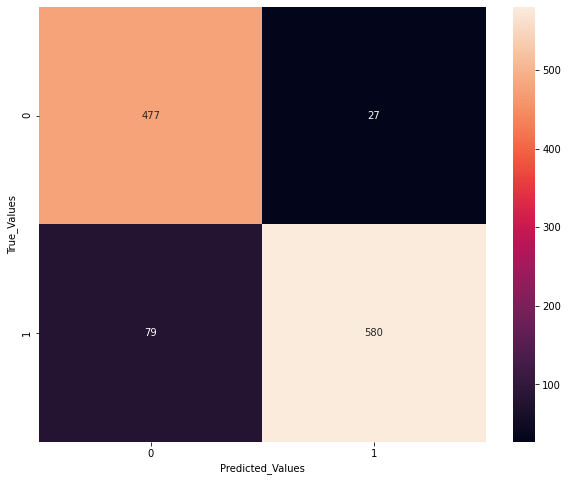

In [70]:
import seaborn as sns
cm = confusion_matrix(yr_test,y_pred_sigmoid)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt="d")
plt.ylabel("True_Values")
plt.xlabel("Predicted_Values")

In [71]:
import pickle

In [72]:
filename = 'Churn_model.sav'

In [73]:
pickle.dump(model_rf_smote, open(filename, 'wb'))

In [74]:
load_model = pickle.load(open(filename, 'rb'))

In [76]:
model_score_r1 = load_model.score(xr_test, yr_test)

In [77]:
model_score_r1

0.938950988822012